# Estimate the value of $\pi$

One way to estimate the value of $\pi$ is to use the Monte Carlo method. The basic idea is to generate random points in a square and use the ratio of points inside a quarter circle to the total number of points to estimate the value of $\pi$. 

1. Import the random module in Python.
2. Generate $n$ random pairs of $x$ and $y$ coordinates between $0$ and $1$. These coordinates will represent points in a unit square. 
3. Determine how many of the points fall inside the unit circle, which is defined as the set of points that are less than or equal to 1 unit away from the origin (0, 0).
4. Calculate an estimate for $\pi$ by multiplying the ratio of the number of points inside the circle to the total number of points by 4.



In [13]:
import random

num_points = 1000

def sample_pi(n):
    points = [(random.uniform(0, 1), random.uniform(0, 1)) for _ in range(n)]
    inside = 0
    for x, y in points:
        d = (x ** 2 + y ** 2) ** 0.5
        if d <= 1:
            inside += 1
    estimate = (inside / n) * 4
    return estimate

sample_pi(num_points) 

3.228

In [14]:
import pandas as pd

choco = pd.read_csv('chocolate.csv')

In [15]:
import numpy as np
from scipy.stats import binom, gamma, beta

# Set the hyperparameters
prior_n = 20
prior_m = 0.9
nu = 2
mu = 4
s = 1
r = 0.1

# Set the observed data
N = len(choco) # number of tested chocolate bars
X = sum(choco['Rating'] >= 2) # number of tasty bars 

# Define the posterior distribution as a function of the parameters
def posterior(n, m, theta):
  # Compute the likelihood of the observed data
  likelihood = binom(N, theta).pmf(X)
  
  # Compute the prior distribution of the parameters
  prior_n = gamma(s, r).pdf(n)
  prior_m = beta(mu, nu).pdf(m)
  prior_theta = beta(n * m, n * (1 - m)).pdf(theta)
  
  # Return the product of the likelihood and the priors as the unnormalized posterior
  return likelihood * prior_n * prior_m * prior_theta

# Initialize the MCMC chain with a random state
np.random.seed(1234)
n = prior_n
m = prior_m
theta = np.random.beta(prior_n * prior_m, prior_n * (1 - prior_m))

# Set the number of iterations for the MCMC algorithm
num_iterations = 10000

# Define empty lists to store the samples from the posterior
n_samples = []
m_samples = []
theta_samples = []

# Run the MCMC algorithm
for i in range(num_iterations):
  # Propose new values for the parameters
  n_prime = np.random.normal(n, 0.1)
  m_prime = np.random.normal(m, 0.01)
  m_prime = np.min([m_prime, 0.999]) # This could be done smarter. How?
    
  theta_prime = np.random.beta(n_prime * m_prime, n_prime * (1 - m_prime))
  theta_prime = np.max([0.001, theta_prime]) # This could be done smarter. How?

  
  # Compute the unnormalized posterior probability at the current state and the proposed state
  p_current = posterior(n, m, theta)
  p_prime = posterior(n_prime, m_prime, theta_prime)
  
  # Compute the acceptance probability
  alpha = p_prime / p_current
  
  # Sample a uniform random variable
  u = np.random.uniform()
  
  # If the random variable is less than the acceptance probability, move to the proposed state
  if u < alpha:
    n = n_prime
    m = m_prime
    theta = theta_prime
  
  # Save the current state in the samples
  n_samples.append(n)
  m_samples.append(m)
  theta_samples.append(theta)

# Compute the posterior means of the samples
n_mean = np.mean(n_samples)
m_mean = np.mean(m_samples)
theta_mean = np.mean(theta_samples)


<ipython-input-15-86c0e4c79381>:27: RuntimeWarning: invalid value encountered in double_scalars
  return likelihood * prior_n * prior_m * prior_theta


In [16]:
# Compute the posterior means of the samples
n_mean = np.mean(n_samples)
m_mean = np.mean(m_samples)
theta_mean = np.mean(theta_samples)

n_mean, m_mean, theta_mean

(15.925569571776467, 0.955800100841836, 0.9903474298859197)

In [17]:
import matplotlib.pyplot as plt

def plot_trace(samples, title=None):
  """
  Plot a trace of the MCMC samples.
  
  Args:
    samples: A list of MCMC samples.
    title: A string with the title of the plot.
  """
  if title:
    plt.title(title)
  plt.plot(samples)
  plt.show()

def plot_histogram(samples, bins=50, title=None):
  """
  Plot a histogram of the MCMC samples.
  
  Args:
    samples: A list of MCMC samples.
    bins: The number of bins in the histogram.
    title: A string with the title of the plot.
  """
  if title:
    plt.title(title)
  plt.hist(samples, bins=bins)
  plt.show()

def plot_autocorrelation(samples, max_lags=50, title=None):
  """
  Plot the autocorrelation function of the MCMC samples.
  
  Args:
    samples: A list of MCMC samples.
    max_lags: The maximum number of lags to compute the autocorrelation for.
    title: A string with the title of the plot.
  """
  if title:
    plt.title(title)
  plt.acorr(samples - np.mean(samples), maxlags=max_lags)
  plt.show()


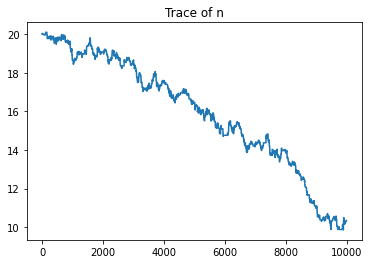

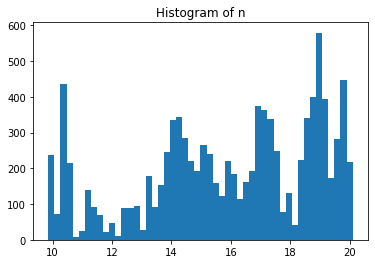

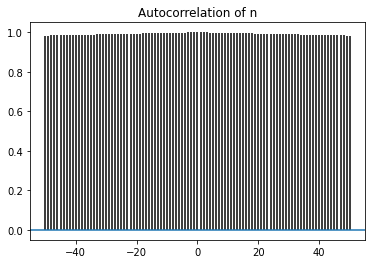

In [18]:
# Plot the trace of the samples for n
plot_trace(n_samples, title="Trace of n")

# Plot the histogram of the samples for n
plot_histogram(n_samples, title="Histogram of n")

# Plot the autocorrelation of the samples for n
plot_autocorrelation(n_samples, title="Autocorrelation of n")


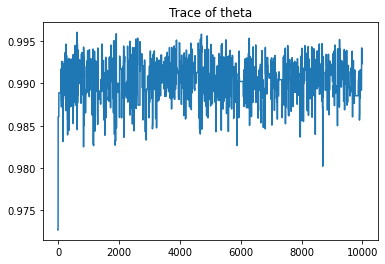

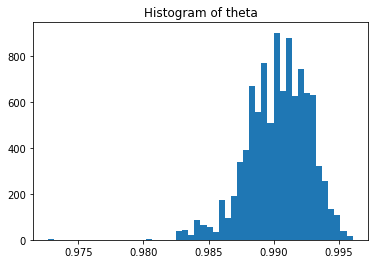

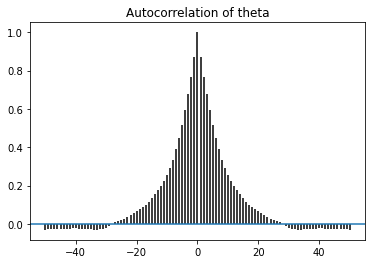

In [19]:
# Plot the trace of the samples for theta
plot_trace(theta_samples, title="Trace of theta")

# Plot the histogram of the samples for theta
plot_histogram(theta_samples, title="Histogram of theta")

# Plot the autocorrelatiotheta of the samples for theta
plot_autocorrelation(theta_samples, title="Autocorrelation of theta")


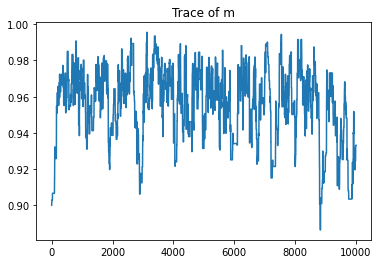

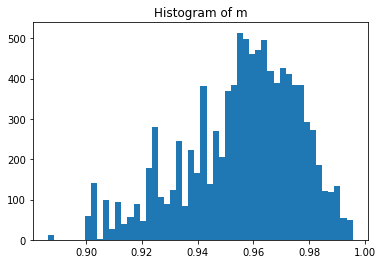

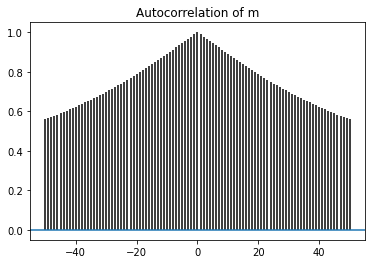

In [20]:
# Plot the trace of the samples for m
plot_trace(m_samples, title="Trace of m")

# Plot the histogram of the samples for m
plot_histogram(m_samples, title="Histogram of m")

# Plot the autocorrelatiom of the samples for m
plot_autocorrelation(m_samples, title="Autocorrelation of m")


## HW 

After this lab, write an e-mail to your TA with "[SAD2] Lab9" as a title with:
- The diagnostics plots (trace, histogram, and autocorrelation) for $\theta$ (if you want with thinning out/burn in applied) and your comment on it - is it safe to infer from this chain? 
- What has the model learned about chocolate? Compare prior and posteriors on $m$, $n$.
- Finally, explain the the difference between Metropolis Hastings algorithm and Gibbs sampling.



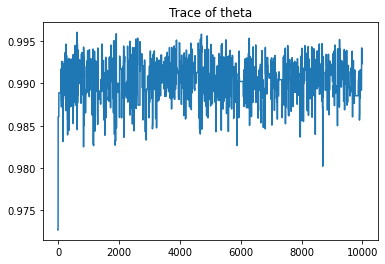

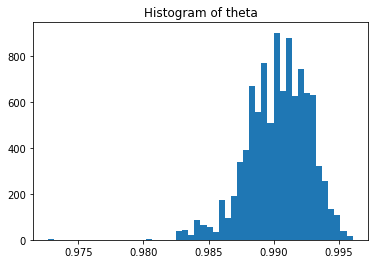

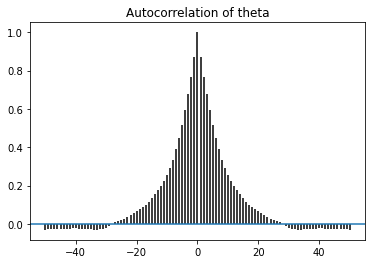

In [21]:
# Plot the trace of the samples for theta
plot_trace(theta_samples, title="Trace of theta")

# Plot the histogram of the samples for theta
plot_histogram(theta_samples, title="Histogram of theta")

# Plot the autocorrelatiotheta of the samples for theta
plot_autocorrelation(theta_samples, title="Autocorrelation of theta")

# 1.a
- Wartości sampli na wykresie trace wydają się być ustabillizowane

# 1.b
- Na histogramie widać, że praktycznie wszystkie wartości są zbite między 0.985 
a 0.995

# 1.c
- Na wykresie autokorelacji widać, że autokorelacja jest dodatnia przed około x = 28 potem jest na chwile zerowa i dalej utrzymuje się na dość stałym ujemnym poziomie. Czyli dla interwal około 28 nie powinno być autokorelacji

# 2

In [49]:
import torch

from torch.distributions.beta import Beta
from torch.distributions.chi2 import Chi2 # gamma

import seaborn as sns

In [68]:
num = len(theta_samples)

m_prior = Beta(mu, nu).sample_n(num)
n_prior = Chi2(s, r).sample_n(num)

prior_samples = torch.stack((m_prior, n_prior, torch.zeros(num))).T

posterior_samples = torch.stack((torch.Tensor(m_samples), torch.Tensor(n_samples), torch.ones(num))).T

data = torch.concatenate((prior_samples, posterior_samples), axis=0).numpy()

df = pd.DataFrame(data, columns=["m", "n", "type"])
df["type"] = ["prior" if i == 0.0 else "posterior" for i in df["type"]]

df

/usr/local/lib/python3.8/dist-packages/torch/distributions/distribution.py:167: UserWarning: sample_n will be deprecated. Use .sample((n,)) instead
  warnings.warn('sample_n will be deprecated. Use .sample((n,)) instead', UserWarning)


,m,n,type
0,0.877242,1.466262,prior
1,0.649791,0.253987,prior
2,0.736094,1.516259,prior
3,0.412551,4.128827,prior
4,0.594438,0.108184,prior
...,...,...,...
19995,0.933141,10.338681,posterior
19996,0.933141,10.338681,posterior
19997,0.933141,10.338681,posterior
19998,0.933141,10.338681,posterior


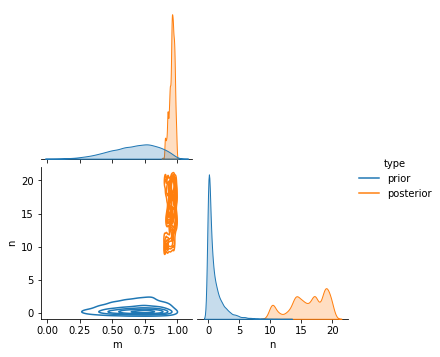

In [69]:
sns.pairplot(df, corner=True, hue="type", kind="kde")

# 3

The Metropolis-Hastings algorithm is a Markov chain Monte Carlo (MCMC) method used to generate samples from a multi-dimensional target distribution. It works by proposing a new sample from a proposal distribution, and then accepting or rejecting the proposed sample based on the ratio of the target distribution to the proposal distribution.

Gibbs sampling is a special case of the Metropolis-Hastings algorithm, where the proposal distribution is chosen to be the conditional distribution of each variable given the current values of the other variables. This means that in Gibbs sampling, new samples are generated by sampling each variable one at a time, conditional on the current values of the other variables.

In summary, both Metropolis-Hastings and Gibbs sampling are used for generating samples from a target distribution, but the difference is in the way the proposal distribution is chosen. Metropolis-Hastings uses a general proposal distribution, while Gibbs sampling uses the conditional distributions of the variables.



